In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### <span style="color:#A0522D">1. Contexte et Présentation des Données  :</span> 

- Le jeu de données utilisé dans ce projet provient de la base Open Source Asset Pricing (OSAP), développée par Bryzgalova, Linnainmaa et Lustig (Université de Chicago, Stanford et UCLA).
Cette base de données open-source a pour objectif de reproduire et de centraliser les principaux facteurs de rendement présentés dans la littérature académique en finance empirique entre 1962 et 2023.


- Plus précisément, nous utilisons le fichier « Monthly Long-Short Returns of 212 Predictors », qui regroupe les rendements mensuels des portefeuilles long-short associés à plus de 200 facteurs (ou « prédicteurs »). Chaque colonne représente un facteur différent, construit selon les définitions des articles de recherche originaux (par exemple Value, Momentum, Investment, Profitability, Liquidity, etc.), tandis que chaque ligne correspond à un mois calendaire.


- Les rendements sont exprimés sous forme de taux mensuels ajustés du risque, calculés sur des portefeuilles neutres au marché. Ces données sont largement utilisées dans les études de validation empirique de modèles d’évaluation d’actifs et de stratégies factorielles (factor investing).

- Pour assurer la qualité statistique de l’échantillon, nous avons restreint notre période d’analyse à 1970–2024, période durant laquelle la majorité des facteurs disposent d’un historique complet. Les données sont déjà harmonisées et nettoyées par les auteurs de la base, ce qui garantit leur fiabilité et permet de se concentrer sur l’analyse méthodologique plutôt que sur la reconstruction des variables.

- parmi les plus de 200 facteurs disponibles dans la base Open Source Asset Pricing, nous avons choisi d’en retenir 15, représentant les dimensions les plus fondamentales de la littérature en finance empirique.
Cette sélection vise à réduire la complexité du jeu de données tout en conservant la diversité économique des sources de rendement.


#### <span style="color:#A0522D">Les Données :</span>

**department** : Le département auquel appartient l'employé.

**promoted** : 1 si l'employé a été promu au cours des 24 derniers mois, 0 sinon.

**review** : Le score composite que l'employé a reçu lors de sa dernière évaluation.

**projects** : Le nombre de projets auxquels l'employé participe.

**salary** : Pour des raisons de confidentialité, le salaire est classé en trois catégories : bas, moyen, élevé.

**tenure** : Le nombre d'années que l'employé a passées dans l'entreprise.

**satisfaction** : Une mesure de la satisfaction des employés issue des enquêtes.

**avg_hrs_month** : Le nombre moyen d'heures que l'employé a travaillé en un mois.

**left** : "oui" si l'employé a fini par quitter l'entreprise, "non" dans le cas contraire.

**Source des Données**  : <a href="https://www.openassetpricing.com/data/" style="color:rgb(160, 82, 45)">openassetpricing</a>






✅ 清洗完成： (648, 15)
Nombre de facteurs avec des valeurs manquantes: 0


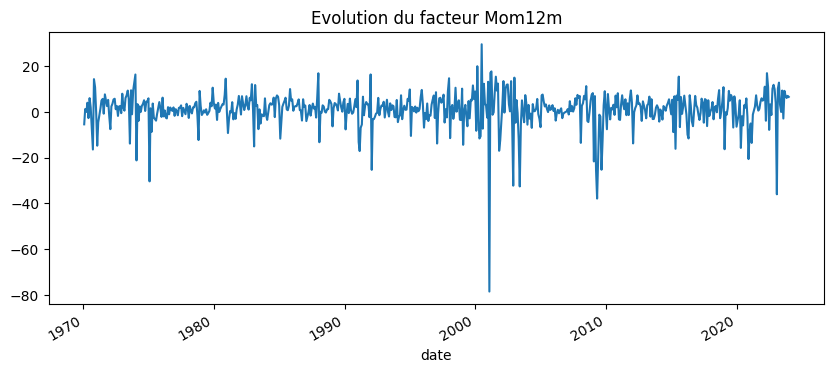

✅ Output clean_factor_returns.csv


In [23]:
# ======================================
# STEP 1: 读取原始数据
# ======================================

df = pd.read_csv("PredictorLSretWide.csv")

# ======================================
# STEP 2: 标准化日期
# ======================================

df.columns = df.columns.str.strip()
if 'Date' in df.columns:
    df.rename(columns={'Date': 'date'}, inplace=True)

# 👇 自动识别这种“1968/6/28”格式的日期
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 设为索引并排序
df = df.set_index('date').sort_index()
# ======================================
# STEP 2: 筛选区间
# ======================================
df = df.loc[(df.index >= "1970-01-01") & (df.index <= "2024-12-31")]


# ======================================
# STEP 2: 选择因子
# ======================================
factors = [
    'BM', 'Mom12m', 'OperProf', 'Investment', 'Size', 
    'VolMkt', 'Beta', 'Illiquidity', 'cfp', 'RoE', 
    'Leverage', 'STreversal', 'MaxRet', 'RealizedVol', 'NetPayoutYield'
]

df = df[factors].dropna(how='all')


print("✅ 清洗完成：", df.shape)
df.head()



# ======================================
# STEP 6: 缺失值检查
# ======================================
missing_ratio = df.isna().mean()
missing_summary = missing_ratio[missing_ratio > 0]
print("Nombre de facteurs avec des valeurs manquantes:", len(missing_summary))



# ======================================
# STEP 8: 可视化检查一个因子
# ======================================
sample_factor = df.columns[1]
df[sample_factor].plot(figsize=(10,4), title=f"Evolution du facteur {sample_factor}")
plt.show()

# ======================================
# STEP 9: 保存清洗后的文件
# ======================================
df.to_csv("clean_factor_returns.csv", index=True)
print("✅ Output clean_factor_returns.csv")
